<a href="https://colab.research.google.com/github/htapiagroup/sistemas-distribuidos-evaluacion-intersemestral-ycamposmca/blob/master/ExamenFinalSistDist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Examen final de Sistemas Distribuidos II

# Elaborado por
# Ana Margarita Reyes Hernández
# Yoselin Araceli Campos Sacramento

# Con ayuda de los compañeros
# Adrián Sosa Medellín 
# Alexis Martínez Arteaga

In [0]:
import pandas as pd, time
import dask.dataframe as dd
import os, time, psutil, gc

In [0]:
gc.enable()

In [0]:
def huella_de_memoria():
  '''Regresa la momoria usada por el proceso de python'''
  mem = psutil.Process(os.getpid()).memory_info().rss
  return (mem / 1024**2)

In [0]:
if not os.path.exists('trip_data.7z'):
  comando = "wget https://archive.org/download/nycTaxiTripData2013/trip_data.7z"
  os.system(comando)

  !7z x trip_data.7z

In [0]:
data = 'trip_data_{}.csv'
datos_csv = [data.format(k) for k in range(1,13)]

lista_diferencias_ttdf_diferencia = []
lista_viajes_largos = []

In [0]:
def todos_pandas():
    new = "new_trip_data_{}.csv"
    for i in range(0, 12):
        huella_inicio = huella_de_memoria()
        huella_inicio
        t_start = time.time()
        df = pd.read_csv(datos_csv[i])
        t_end = time.time()
        huella_fin = huella_de_memoria()
        print('Tiempo que tarda pandas en construir un DataFrame: {} s'.format(t_end-t_start))

        huella_fin
        print("La huella de memoria utilizada para el proceso fue: {} mb".format(huella_fin - huella_inicio))
        try:
          df = pd.read_csv(archivo, usecols=["medallion",  "pickup_datetime", "dropoff_datetime", "passenger_count", "trip_time_in_secs", "trip_distance", "pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude"])
        except :
          pass
        try:
          df = pd.read_csv(archivo, usecols=["medallion",  " pickup_datetime", " dropoff_datetime", " passenger_count", " trip_time_in_secs", " trip_distance", " pickup_longitude", " pickup_latitude", " dropoff_longitude", " dropoff_latitude"])
        except :
          pass
        df = df.rename(columns=lambda x: x.strip())
        
        df.isna().sum()
        df_nulos_p1 = df[df['store_and_fwd_flag'].isna()]
        df_nulos_p2 = df[df['dropoff_longitude'].isna()]
        df_nulos_p3 = df[df['dropoff_latitude'].isna()]
        df = df.dropna(how='all', subset=['dropoff_longitude', 'dropoff_latitude'])
        df = df.dropna(how='all', subset=['store_and_fwd_flag'])
        df.isna().sum()
        df = df.dropna()
        df = df.drop(df[df.passenger_count > 9].index)
        td_dife_cero = (df['trip_distance'] != 0.0)
        inicio = time.time()
        td_dife_cero.mean()
        fin = time.time()
        print('Tiempo que tarda pandas en optener el promedio de la distancia de viaje: {} s'.format(fin-inicio))
        df.shape
        df.to_csv(new.format(i))

In [0]:
todos_pandas()

Tiempo que tarda pandas en construir un DataFrame: 47.7249014377594 s
La huella de memoria utilizada para el proceso fue: 4737.0546875 mb
Tiempo que tarda pandas en optener el promedio de la distancia de viaje: 0.015612363815307617 s


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2828: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


Tiempo que tarda pandas en construir un DataFrame: 47.13192677497864 s
La huella de memoria utilizada para el proceso fue: 259.8125 mb
Tiempo que tarda pandas en optener el promedio de la distancia de viaje: 0.010974645614624023 s
Tiempo que tarda pandas en construir un DataFrame: 53.235795736312866 s
La huella de memoria utilizada para el proceso fue: 228.88671875 mb
Tiempo que tarda pandas en optener el promedio de la distancia de viaje: 0.011558771133422852 s
Tiempo que tarda pandas en construir un DataFrame: 52.799264907836914 s
La huella de memoria utilizada para el proceso fue: 798.015625 mb
Tiempo que tarda pandas en optener el promedio de la distancia de viaje: 0.01138448715209961 s
Tiempo que tarda pandas en construir un DataFrame: 51.79971671104431 s
La huella de memoria utilizada para el proceso fue: 1164.953125 mb
Tiempo que tarda pandas en optener el promedio de la distancia de viaje: 0.011755228042602539 s
Tiempo que tarda pandas en construir un DataFrame: 49.084856986999

In [0]:
def promedio_trip_distance(data_frame):
    td_dask = data_frame['trip_distance']
    t_inicio = time.time()
    td_dask.mean()
    t_fin = time.time()
    print("El tiempo que tarda Dask en obtener el promedio de trip_distance es: {} s".format(t_fin-t_inicio))

In [0]:

def promedio_trip_time_in_secs(data_frame):
    ttis_dask = data_frame['trip_time_in_secs']
    tiempo_i = time.time()
    ttis_dask.mean()
    tiempo_f = time.time()
    print("El tiempo que tarda Dask en obtener el promedio de trip_time_in_secs es: {} s".format(tiempo_f-tiempo_i))

In [0]:
def diferencia_pickup_dropoff(data_frame):
    data_frame['pickup_datetime'] = ddf.to_datetime(data_frame['pickup_datetime'])
    data_frame['dropoff_datetime'] = ddf.to_datetime(data_frame['dropoff_datetime'])
    duracion = data_frame['dropoff_datetime'] - data_frame['pickup_datetime']
    data_frame = data_frame.assign(Duracion = duracion)
    data_frame['Duracion'] = data_frame['Duracion'].dt.total_seconds()
    comparacion = data_frame['Duracion'] - data_frame['trip_time_in_secs']
    comparacion.astype('int64')
    v = comparacion.count().compute()
    lista_diferencias_ttdf_diferencia.append(v)

In [0]:
def definir_viajes_largos(data_frame):
    viajes_largos = data_frame[data_frame['trip_time_in_secs'] > 1200]
    v = viajes_largos['trip_time_in_secs'].count().compute()
    lista_viajes_largos.append(v)
    

In [0]:
def taxis_diferentes(data_frame):
    taxis = viajes_largos.groupby('medallion')
    taxis.count().compute()
    vehiculo = viajes_largos
    vehiculos = vehiculo.drop(['hack_license', 'vendor_id', 'store_and_fwd_flag',
       'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'trip_time_in_secs', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'], axis=1)
    print("Vehiculo que mas viajes hizo al mes: ")
    vehiculos.max().compute()

In [0]:
data = 'new_trip_data_{}.csv'
datos_csv_clean = [data.format(k) for k in range(1,13)]

In [0]:
def main():
    for i in range(0,11):
        print("archivo csv: {}".format(i))
        df_dask = ddf.read_csv(datos_csv_clean[i], low_memory = False)
        promedio_trip_distance(df_dask)
        promedio_trip_time_in_secs(df_dask)
        diferencia_pickup_dropoff(df_dask)
        definir_viajes_largos(df_dask)

In [0]:
main()

archivo csv: 0
El tiempo que tarda Dask en obtener el promedio de trip_distance es: 0.0013835430145263672 s
El tiempo que tarda Dask en obtener el promedio de trip_time_in_secs es: 0.0013022422790527344 s
archivo csv: 1
El tiempo que tarda Dask en obtener el promedio de trip_distance es: 0.0012683868408203125 s
El tiempo que tarda Dask en obtener el promedio de trip_time_in_secs es: 0.0013365745544433594 s
archivo csv: 2
El tiempo que tarda Dask en obtener el promedio de trip_distance es: 0.0014035701751708984 s
El tiempo que tarda Dask en obtener el promedio de trip_time_in_secs es: 0.0013399124145507812 s
archivo csv: 3
El tiempo que tarda Dask en obtener el promedio de trip_distance es: 0.001218557357788086 s
El tiempo que tarda Dask en obtener el promedio de trip_time_in_secs es: 0.001299142837524414 s
archivo csv: 4
El tiempo que tarda Dask en obtener el promedio de trip_distance es: 0.0012836456298828125 s
El tiempo que tarda Dask en obtener el promedio de trip_time_in_secs es: 0

FileNotFoundError: ignored

In [0]:
contador = 0
for i in lista_diferencias_ttdf_diferencia:
    print("El archivo {} tiene {} diferencias".format((contador+1), i))
    contador=contador+1

El archivo 1 tiene 14776615 diferencias
El archivo 2 tiene 13990176 diferencias
El archivo 3 tiene 7037625 diferencias
El archivo 4 tiene 7929984 diferencias
El archivo 5 tiene 7581811 diferencias
El archivo 6 tiene 7663193 diferencias
El archivo 7 tiene 7162744 diferencias
El archivo 8 tiene 6833080 diferencias
El archivo 9 tiene 6530479 diferencias
El archivo 10 tiene 6948326 diferencias
El archivo 11 tiene 7474930 diferencias
El archivo 12 tiene 7135844 diferencias
El archivo 13 tiene 6912206 diferencias


In [0]:
contador = 0
for j in lista_viajes_largos:
    print("El archivo {} tiene {} viajes que duraron mas de 20 minutos".format((contador+1), j))
    contador=contador+1

El archivo 1 tiene 1715237 viajes que duraron mas de 20 minutos
El archivo 2 tiene 1768887 viajes que duraron mas de 20 minutos
El archivo 3 tiene 897790 viajes que duraron mas de 20 minutos
El archivo 4 tiene 1069947 viajes que duraron mas de 20 minutos
El archivo 5 tiene 1143265 viajes que duraron mas de 20 minutos
El archivo 6 tiene 1283422 viajes que duraron mas de 20 minutos
El archivo 7 tiene 1199244 viajes que duraron mas de 20 minutos
El archivo 8 tiene 1042837 viajes que duraron mas de 20 minutos
El archivo 9 tiene 1013236 viajes que duraron mas de 20 minutos
El archivo 10 tiene 1205482 viajes que duraron mas de 20 minutos
El archivo 11 tiene 1280631 viajes que duraron mas de 20 minutos
El archivo 12 tiene 1190971 viajes que duraron mas de 20 minutos
El archivo 13 tiene 1211183 viajes que duraron mas de 20 minutos


In [0]:
nombre = 'new_trip_data_{}.csv'
files= [nombre.format(i) for i in range(12)]
bestaxis=[]

In [0]:
for file in files:
  df = ddf.read_csv(file, usecols=["medallion", "pickup_datetime", "dropoff_datetime"])
  df["pickup_datetime"] = dd.to_datetime(df["pickup_datetime"])
  df["dropoff_datetime"] = dd.to_datetime(df["dropoff_datetime"])
  df["duracion"] = df["dropoff_datetime"] - df["pickup_datetime"]
  df["duracion"] = df["duracion"].dt.total_seconds()
  longTrip = df[(df["duracion"] > 1200)]
  # la siguiente funcion es aportacion de Daniel Hdz.
  temp=df['medallion'].value_counts().compute()
  taxs = temp.shape[0]
  bestaxis.append(temp.index[0])
  print("El archivo {} tiene {} taxis diferentes.".format(file, taxs))
  print("top 10 de taxis con viajes largos:")
  print(temp[:10])
  print("\nTaxi que mas viajes realizan cada mes: \n {}".format(temp.index[0]))
  print("/// --------------------------------------------------------------------- ///")

El archivo new_trip_data_0.csv tiene 6625 taxis diferentes.
top 10 de taxis con viajes largos:
7E1346F23960CC18D7D129FA28B63A75    2137
6FE6DFF9A59C0B64BE0CA64EE2699F08    1941
06C961EBE7EF4D13F3AE6C005EE0F501    1893
22908753E00888CC219C875C8D5BC4F6    1886
6403BF98E4618E21C795C3B45A636D77    1882
E9FD29C830D1C3D9C06B5D34E959B4B4    1870
BC9EE7F807E71ACA2AEA11CAB51604F8    1869
FB0E9C6498122E383A2D4E2D13A5D3FF    1869
FC229C5E8895E11202ED3AED12366745    1866
B45D01B7B5A22CFA218DEBC41C36C152    1866
Name: medallion, dtype: int64

Taxi que mas viajes realizan cada mes: 
 7E1346F23960CC18D7D129FA28B63A75
/// --------------------------------------------------------------------- ///
El archivo new_trip_data_1.csv tiene 6625 taxis diferentes.
top 10 de taxis con viajes largos:
6FE6DFF9A59C0B64BE0CA64EE2699F08    1939
DB51F659A90E9457DD2A2F4D5A2A3186    1936
E90134322479C5C01D82226C11425CD0    1837
C7BF056F5E2EF6D4CCF68EA4A23502A7    1836
BC9EE7F807E71ACA2AEA11CAB51604F8    1803
E5D06DBAEF87

In [0]:
import matplotlib.pyplot as plt

In [0]:
nombre = 'new_trip_data_{}.csv'
files= [nombre.format(i) for i in range(12)]

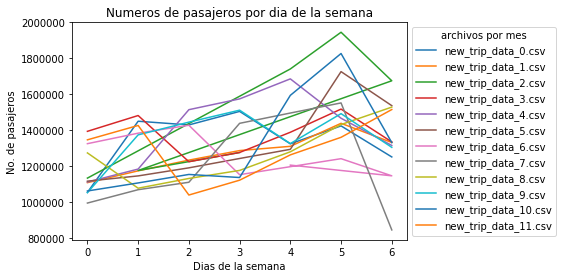

In [0]:
for file in files:
  df = dd.read_csv(file, usecols=["passenger_count", "dropoff_datetime"])
  df["dropoff_datetime"] = ddf.to_datetime(df["dropoff_datetime"])
  df["dia"] = df["dropoff_datetime"].dt.weekday
  dia = df.groupby("dia")
  sdia = dia["passenger_count"].sum()
  plt.plot(sdia.compute(), label= file)
  df =""
  dia=""
  sdia=""
plt.title("Numeros de pasajeros por dia de la semana")
plt.ylabel("No. de pasajeros")
plt.xlabel("Dias de la semana")
# la siguiente funcion es aportacion de Daniel Hdz.
plt.legend(title="archivos por mes", loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

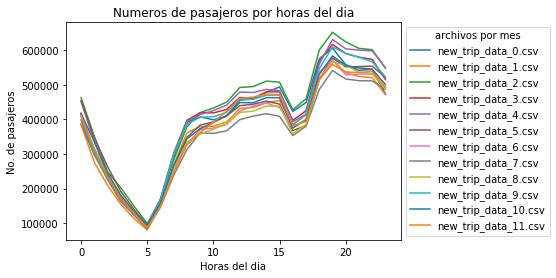

In [0]:
for file in files:
  df = dd.read_csv(file, usecols= ["passenger_count", "dropoff_datetime"])
  df["dropoff_datetime"] = dd.to_datetime(df["dropoff_datetime"])
  df["hora"] = df["dropoff_datetime"].dt.hour
  hora = df.groupby("hora")
  shora = hora["passenger_count"].sum()
  plt.plot(shora.compute(), label= file)
  df =""
  dia=""
  sdia=""
plt.title("Numeros de pasajeros por horas del dia")
plt.ylabel("No. de pasajeros")
plt.xlabel("Horas del dia")
# la siguiente funcion es aportacion de Daniel Hdz.
plt.legend(title="archivos por mes", loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

punto 10 very very very pinches dificil

In [0]:

colores = ["red", "green", "blue", "gray", "pink", "orange"]
dias = ["Lunes", "Martes", "Miercoles", "jueves", "viernes","Sabado", "Domingo"]

In [0]:
!pip install pyproj

     |████████████████████████████████| 11.2MB 41.3MB/s 


In [0]:
import pyproj
from pyproj import Proj, transform
from bokeh.models import BoxZoomTool
from bokeh.plotting import figure, output_notebook, show
from bokeh.tile_providers import STAMEN_TERRAIN

In [0]:
## ESTA CELDA DE CODIGO NOS LA PROPORCIONO EL DR. HORACIO EN LA CLASE 6
NYC = x_range, y_range = ((-8242000,-8210000), (4965000,4990000))

plot_width  = int(750)
plot_height = int(plot_width//1.2)

def base_plot(tools='pan,wheel_zoom,reset',plot_width=plot_width, plot_height=plot_height, **plot_args):
    p = figure(tools=tools, plot_width=plot_width, plot_height=plot_height,
        x_range=x_range, y_range=y_range, outline_line_color=None,
        min_border=0, min_border_left=0, min_border_right=0,
        min_border_top=0, min_border_bottom=0, **plot_args)

    p.axis.visible = False
    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None

    p.add_tools(BoxZoomTool(match_aspect=True))

    return p

In [0]:
output_notebook()
p = base_plot()
p.add_tile(STAMEN_TERRAIN)
for j in range(1,13):
  taxi = bestaxis[j-1]
  df = dd.read_csv('new_trip_data_{}.csv'.format(j-1), usecols=["medallion", "pickup_datetime", "pickup_longitude", "pickup_latitude"])
  df = df[df["medallion"] == taxi]
  df["pickup_datetime"] = dd.to_datetime(df["pickup_datetime"])
  df["dia"] = df["pickup_datetime"].dt.dayofweek
  df = df.compute()
  df["pickup_longitude"], df["pickup_latitude"]= zip(*df.apply(lambda x:  transform(Proj(init='epsg:4326'), Proj(init='epsg:3857'), x["pickup_longitude"], x["pickup_latitude"]), axis=1))
  dia = df.groupby("dia")
  for i in range(0,6):
    df = dia.get_group(i).sample(n=len(dia.get_group(i)))
    p.circle(x=df["pickup_longitude"], y=df["pickup_latitude"], legend=dias[i], fill_color=colores[i], line_color=None)
show(p)

cambiar dropoff por pickup 

In [0]:
horas =[ "00:00 - 03:59", "04:00 - 07:59", "08:00 - 11:59","12:00 - 15:59","16:00 - 19:59", "20:00 - 11:59"]

In [0]:
output_notebook()
p = base_plot()
p.add_tile(STAMEN_TERRAIN)
for j in range(1,13):
  taxi = bestaxis[j-1]
  df = dd.read_csv('new_trip_data_{}.csv'.format(j-1), usecols=["medallion", "pickup_datetime", "pickup_longitude", "pickup_latitude"])
  df = df[df["medallion"] == taxi]
  df["pickup_datetime"] = dd.to_datetime(df["pickup_datetime"])
  df["hora"] = df["pickup_datetime"].dt.hour
  df["grupo"] = df['hora'] // 4
  df = df.compute()
  df["pickup_longitude"], df["pickup_latitude"]= zip(*df.apply(lambda x: transform(Proj(init='epsg:4326'), Proj(init='epsg:3857'), x["pickup_longitude"], x["pickup_latitude"]), axis=1))
  dia = df.groupby("grupo")
  for i in range(0,6):
    df = dia.get_group(i).sample(n=len(dia.get_group(i)))
    p.circle(x=df["pickup_longitude"], y=df["pickup_latitude"], legend=horas[i], fill_color=colores[i], line_color=None)
show(p)

punto 11

In [0]:
horas =[ "00:00 - 03:59", "04:00 - 07:59", "08:00 - 11:59","12:00 - 15:59","16:00 - 19:59", "20:00 - 11:59"]



cambiar pickup time por dropoff_datetime

In [0]:
output_notebook()
p = base_plot()
p.add_tile(STAMEN_TERRAIN)
for j in range(1,13):
  taxi = bestaxis[j-1]
  df = dd.read_csv('new_trip_data_{}.csv'.format(j-1), usecols=["medallion", "dropoff_datetime", "dropoff_longitude", "dropoff_latitude"])
  df = df[df["medallion"] == taxi]
  df["dropoff_datetime"] = dd.to_datetime(df["dropoff_datetime"])
  df["dia"] = df["dropoff_datetime"].dt.dayofweek
  df = df.compute()
  df["dropoff_longitude"], df["dropoff_latitude"]= zip(*df.apply(lambda x: transform(Proj(init='epsg:4326'), Proj(init='epsg:3857'), x["dropoff_longitude"], x["dropoff_latitude"]), axis=1))
  dia = df.groupby("dia")
  for i in range(0,6):
    df = dia.get_group(i).sample(n=len(dia.get_group(i)))
    p.circle(x=df["dropoff_longitude"], y=df["dropoff_latitude"], legend=dias[i], fill_color=colores[i], line_color=None)
show(p)

In [0]:
output_notebook()
p = base_plot()
p.add_tile(STAMEN_TERRAIN)
for j in range(1,13):
  taxi = bestaxis[j-1]
  df = dd.read_csv('new_trip_data_{}.csv'.format(j-1), usecols=["medallion", "dropoff_datetime", "dropoff_longitude", "dropoff_latitude"])
  df = df[df["medallion"] == taxi]
  df["dropoff_datetime"] = dd.to_datetime(df["dropoff_datetime"])
  df["hora"] = df["dropoff_datetime"].dt.hour
  df["grupo"] = df['hora'] // 4
  df = df.compute()
  df["dropoff_longitude"], df["dropoff_latitude"]= zip(*df.apply(lambda x: transform(Proj(init='epsg:4326'), Proj(init='epsg:3857'), x["dropoff_longitude"], x["dropoff_latitude"]), axis=1))
  dia = df.groupby("grupo")
  for i in range(0,6):
    df = dia.get_group(i).sample(n=len(dia.get_group(i)))
    p.circle(x=df["dropoff_longitude"], y=df["dropoff_latitude"], legend=horas[i], fill_color=colores[i], line_color=None)
show(p)